<a href="https://colab.research.google.com/github/joymuli10/Supermarket-Analysis-Unsupervised-Learning-R/blob/main/Sales_Anomaly_Detection_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
install.packages("tidyverse")
library(tidyverse)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ tibble  3.0.4     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.0
✔ purrr   0.3.4     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::arrange()    masks plyr::arrange()
✖ readr::col_factor() masks scales::col_factor()
✖ purrr::compact()    masks plyr::compact()
✖ dplyr::count()      masks plyr::count()
✖ purrr::discard()    masks scales::discard()
✖ tidyr::expand()     masks Matrix::expand()
✖ dplyr::failwith()   masks plyr::failwith()
✖ dplyr::filter()     masks stats::filter()
✖ dplyr::id()         masks plyr::id()
✖ dplyr::lag()        masks stats::lag()
✖ dplyr::mutate()     masks plyr::mutate()
✖ tidyr::pack()       masks Matrix::pack()
✖ dplyr::recode()     masks arules::recode()
✖ dplyr::rename()     masks plyr::rename()
✖ dplyr::su

In [34]:
# Loading the dataset
sales <- read.csv(file = 'http://bit.ly/CarreFourSalesDataset')
head(sales)

,Date,Sales
,<chr>,<dbl>
1,1/5/2019,548.9715
2,3/8/2019,80.2200
3,3/3/2019,340.5255
4,1/27/2019,489.0480
5,2/8/2019,634.3785
6,3/25/2019,627.6165


In [35]:
# Checking the names of the columns
names(sales)

[1] "Date"  "Sales"

In [36]:
# Checking the summary
summary(sales)

     Date               Sales        
 Length:1000        Min.   :  10.68  
 Class :character   1st Qu.: 124.42  
 Mode  :character   Median : 253.85  
                    Mean   : 322.97  
                    3rd Qu.: 471.35  
                    Max.   :1042.65  

In [37]:
#The rows and columns in the data 
cat("The dataset has ", dim(sales)[1], "rows and ", dim(sales)[2], " columns")

The dataset has  1000 rows and  2  columns

In [38]:
# Checking the structure of the data
str(sales)

'data.frame':	1000 obs. of  2 variables:
 $ Date : chr  "1/5/2019" "3/8/2019" "3/3/2019" "1/27/2019" ...
 $ Sales: num  549 80.2 340.5 489 634.4 ...


In [40]:
install.packages("anomalize")
library(anomalize)

# Collect our time series data
tidyverse_cran_downloads

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘SQUAREM’, ‘lava’, ‘listenv’, ‘parallelly’, ‘TTR’, ‘prodlim’, ‘future’, ‘globals’, ‘quadprog’, ‘quantmod’, ‘gower’, ‘ipred’, ‘furrr’, ‘modeldata’, ‘hexbin’, ‘data.table’, ‘warp’, ‘fracdiff’, ‘lmtest’, ‘tseries’, ‘urca’, ‘RcppArmadillo’, ‘recipes’, ‘rsample’, ‘plotly’, ‘padr’, ‘xts’, ‘zoo’, ‘slider’, ‘anytime’, ‘timeDate’, ‘forecast’, ‘timetk’, ‘sweep’, ‘tibbletime’


══ Use anomalize to improve your Forecasts by 50%! ═════════════════════════════
Business Science offers a 1-hour course - Lab #18: Time Series Anomaly Detection!
</> Learn more at: https://university.business-science.io/p/learning-labs-pro </>



date,count,package
<date>,<dbl>,<chr>
2017-01-01,873,tidyr
2017-01-02,1840,tidyr
2017-01-03,2495,tidyr
2017-01-04,2906,tidyr
2017-01-05,2847,tidyr
2017-01-06,2756,tidyr
2017-01-07,1439,tidyr
2017-01-08,1556,tidyr
2017-01-09,3678,tidyr


# Detecting our anomalies
# ----
We use the following functions to detect and visualize anomalies; 
We decomposed the “count” column into “observed”, “season”, “trend”, and “remainder” columns. The default values for time series decompose are method = "stl", 
which is just seasonal decomposition using a Loess smoother (refer to stats::stl()). 
The frequency and trend parameters are automatically set based on the time scale (or periodicity) of the time series using tibbletime based function under the hood.
#time_decompose() - 
this function would help with time series decomposition.
# anomalize() -
We perform anomaly detection on the decomposed data using 
the remainder column through the use of the anomalize() function which procides 3 new columns; “remainder_l1” (lower limit), “remainder_l2” (upper limit), and “anomaly” (Yes/No Flag).
The default method is method = "iqr", which is fast and relatively accurate at detecting anomalies. The alpha parameter is by default set to alpha = 0.05, 
but can be adjusted to increase or decrease the height of the anomaly bands, making it more difficult or less difficult for data to be anomalous. 
The max_anoms parameter is by default set to a maximum of max_anoms = 0.2 
for 20% of data that can be anomalous. 
# time_recompose()-
We create the lower and upper bounds around the “observed” values 
through the use of the time_recompose() function, which recomposes the lower and upper bounds of the anomalies around the observed values.
We create new columns created: “recomposed_l1” (lower limit) and “recomposed_l2” (upper limit).
#plot_anomalies() - 
we now plot using plot_anomaly_decomposition() to visualize out data.

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

Registered S3 methods overwritten by 'forecast':
  method                 from     
  autoplot.Arima         ggfortify
  autoplot.acf           ggfortify
  autoplot.ar            ggfortify
  autoplot.bats          ggfortify
  autoplot.decomposed.ts ggfortify
  autoplot.ets           ggfortify
  autoplot.forecast      ggfortify
  autoplot.stl           ggfortify
  autoplot.ts            ggfortify
  fitted.ar              ggfortify
  fortify.ts             ggfortify
  residuals.ar           ggfortify



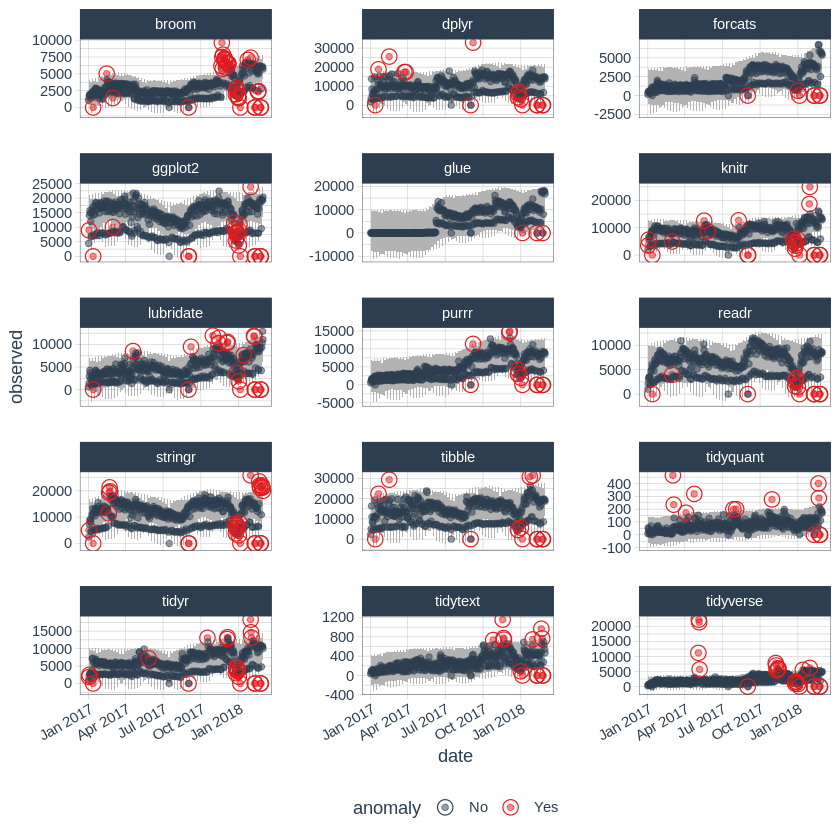

In [41]:
tidyverse_cran_downloads %>%
    time_decompose(count) %>%
    anomalize(remainder) %>%
    time_recompose() %>%
    plot_anomalies(time_recomposed = TRUE, ncol = 3, alpha_dots = 0.5)

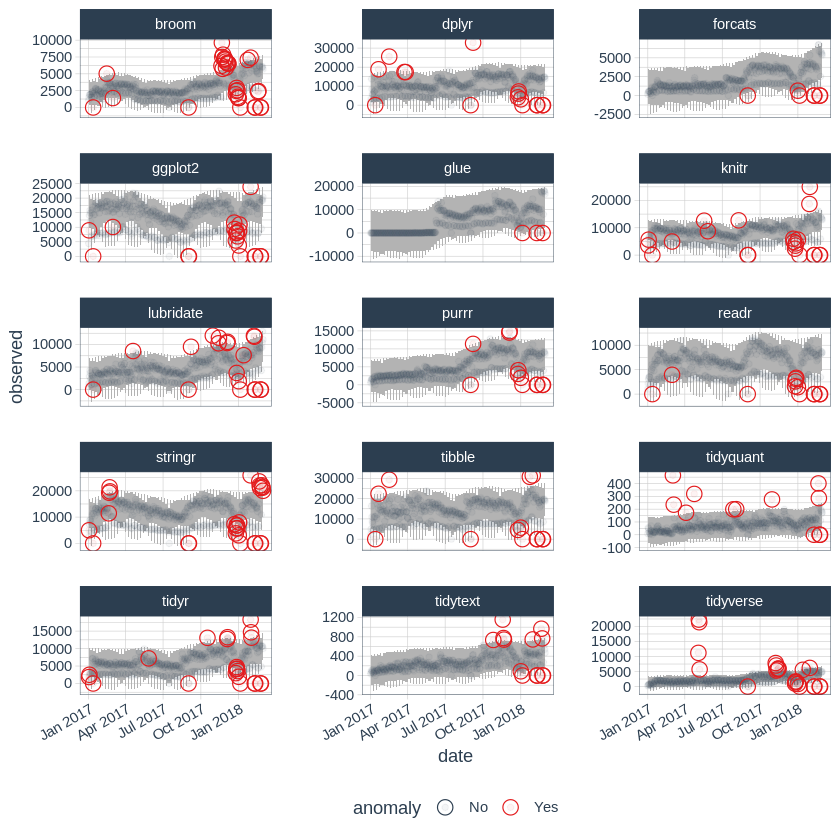

In [42]:
tidyverse_cran_downloads %>%
    time_decompose(count) %>%
    anomalize(remainder) %>%
    time_recompose() %>%
    plot_anomalies(time_recomposed = TRUE, ncol = 3, alpha_dots = 0.05)

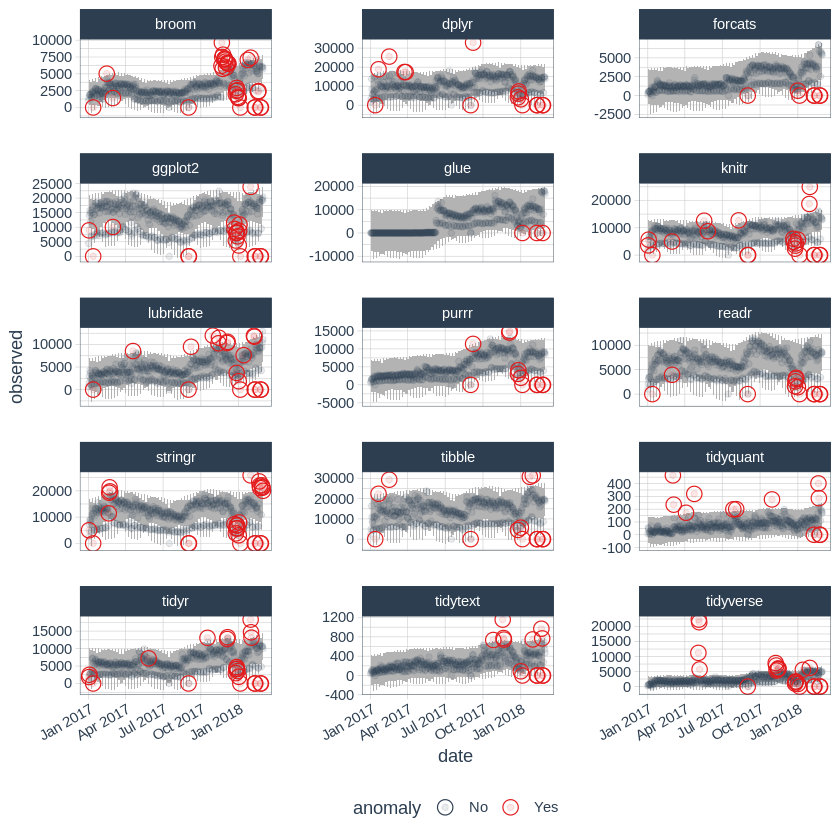

In [43]:
tidyverse_cran_downloads %>%
    time_decompose(count) %>%
    anomalize(remainder) %>%
    time_recompose() %>%
    plot_anomalies(time_recomposed = TRUE, ncol = 3, alpha_dots = 0.1)